<div style="">
<img src="logo.jpg", width=150, ALIGN="left", border=20>
<h1>Starting Kit for Data Science Africa challenge </h1>
<br>This code was tested with <br>
Python 3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:07:29) (https://anaconda.org/)<br>
<i> Adapted for Chalab by Isabelle Guyon from original code of Balázs Kégl</i> <br>
<a href="http://www.datascience-paris-saclay.fr">Paris Saclay Center for Data Science (CDS)</a>
</center>
<p>
</div>

<div style="">
    <h1>Introduction </h1>
</div>

In [1]:
model_dir = 'sample_code_submission/'                        # Change the model to a better one once you have one!
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
%load_ext autoreload
%autoreload 2
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from data_io import read_as_df
import numpy as np
from matplotlib import pyplot as plt
from data_manager import DataManager

In [2]:
data_dir = 'sample_data'
data_name = 'microscopy'
!ls $data_dir

microscopy_feat.name	 microscopy_test.data	    microscopy_valid.data
microscopy_label.name	 microscopy_test.solution   microscopy_valid.solution
microscopy_private.info  microscopy_train.data
microscopy_public.info	 microscopy_train.solution


<div>
    <h1> Step 1: Patch Classification </h1>
<p>
The goal for this step is to create a model in order model in order to classify either a patch contains parasite or not.
</p>
</div>

### 1.1 Introduction

Below are some example of class of positive and negative classes. 

In [3]:
data = read_as_df(data_dir  + '/' + data_name)                # The data are loaded as a Pandas Data Frame

Reading sample_data/microscopy_train from AutoML format
Number of examples = 10000
Number of features = 4800
      Class
0  negative
1  positive
Number of classes = 2


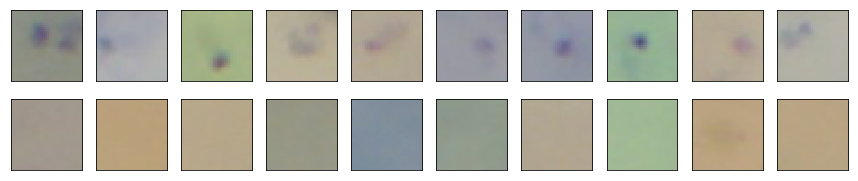

In [4]:
N_samples_to_display = 10

train_X = data.drop(["target"], 1)
pos_indices = data[data.target == "positive"].drop(["target"], 1).index
pos_indices = pos_indices[np.random.permutation(len(pos_indices))]

for i in range(N_samples_to_display):
    plt.subplot(2,N_samples_to_display,i+1)
    example_pos = train_X.loc[pos_indices[i], :]
    example_pos = np.reshape(list(example_pos), (40, 40, 3))
    #example_pos = np.swapaxes(example_pos,0,2)
    #print(example_pos)
    plt.imshow(example_pos / 255)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')    

neg_indices = data[data.target == "negative"].drop(["target"], 1).index
neg_indices = neg_indices[np.random.permutation(len(neg_indices))]
for i in range(N_samples_to_display,2*N_samples_to_display):
    plt.subplot(2,N_samples_to_display,i+1)
    example_neg = train_X.loc[neg_indices[i], :]
    example_neg = np.reshape(list(example_neg), (40, 40, 3))
    plt.imshow(example_neg / 255)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')

plt.gcf().set_size_inches(1.5*N_samples_to_display,3)

### 1.2 Load DataManager
This section reads data (Train, Valid, Test) and its solutions using DataManager.

In [5]:
D = DataManager(data_name, data_dir, replace_missing=True)
print(D)

Info file found : /home/herilalaina/Documents/PhD/activité/dsa_2019/mini_challenge/sample_data/microscopy_public.info
DataManager : microscopy
info:
	has_missing = 0
	format = dense
	feat_type = Numerical
	label_num = 1
	name = microscopy
	metric = auc_binary
	usage = Sample dataset Microscopy data
	task = binary.classification
	valid_num = 10000
	time_budget = 300
	target_num = 1
	test_num = 10000
	target_type = Numerical
	feat_num = 4800
	is_sparse = 0
	train_num = 10000
	has_categorical = 0
data:
	X_train = array(10000, 4800)
	Y_train = array(10000,)
	X_valid = array(10000, 4800)
	Y_valid = array(10000,)
	X_test = array(10000, 4800)
	Y_test = array(10000,)
feat_type:	array(4800,)
feat_idx:	array(0,)



### 1.3 Training a predictive model
We provide an example of predictive model for classification in the `sample_code_submission/model.py` directory. It is a simple deep neural network with three convolutional layer.

In [6]:
from data_io import write
from model import Model
# Uncomment the next line to show the code of the model
??Model 

<div>
    Train the model and make predictions. 
</div>

In [7]:
M = Model()

X_train = D.data['X_train']
Y_train = D.data['Y_train']
M.fit(X_train, Y_train)

Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

Epoch 1/5
10000/10000 [==============================] - 9s 939us/sample - loss: 0.6645 - accuracy: 0.6206
Epoch 2/5
10000/10000 [==============================] - 9s 942us/sample - loss: 0.5439 - accuracy: 0.7560
Epoch 3/5
10000/10000 [==============================] - 9s 918us/sample - loss: 0.4605 - accuracy: 0.8225
Epoch 4/5
10000/10000 [==============================] - 9s 911us/sample - loss: 0.4176 - accuracy: 0.8509
Epoch 5/5
10000/10000 [==============================] - 10s 976us/sample - loss: 0.3957 - accuracy: 0.8614


### 1.4 Scoring the results
The metric used in this step is the Area Under the Curve of ROC. This section reports the performance on Train, Valid, Test set of the sample data.

In [8]:
from sklearn.metrics import roc_auc_score
metric_name, scoring_function = "auc_binary", roc_auc_score
print('Using scoring metric:', metric_name)
# Uncomment the next line to display the code of the scoring metric
#??scoring_function

Using scoring metric: auc_binary


In [9]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
print('Valid score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['Y_valid'], Y_hat_valid))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))

Training score for the auc_binary metric = 0.9126
Valid score for the auc_binary metric = 0.9265
Ideal score for the auc_binary metric = 1.0000


### 1.5 Save submission
In this section, we store predictions into `result_dir`

In [47]:
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
result_name_ = result_name + "_"
!ls $result_name_*

sample_result_submission/microscopy_test.predict
sample_result_submission/microscopy_train.predict
sample_result_submission/microscopy_valid.predict


# Step 2: Making a submission 

<h2> Unit testing </h2> 

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
<br>
Keep the sample code simple.

We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.
    <br>
    <span style="color:red"> Just change the data name in the block below. In the rest of the section, replace the sample plots by anything you want. </span>

In [10]:
data_dir = 'sample_data'              # Change this to the directory where you put the input data

In [24]:
import sys
env_python = sys.executable

In [25]:
!$env_python $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

Using input_dir: /home/herilalaina/Documents/PhD/activité/dsa_2019/mini_challenge/sample_data
Using output_dir: /home/herilalaina/Documents/PhD/activité/dsa_2019/mini_challenge/sample_result_submission
Using program_dir: /home/herilalaina/Documents/PhD/activité/dsa_2019/mini_challenge/ingestion_program
Using submission_dir: /home/herilalaina/Documents/PhD/activité/dsa_2019/mini_challenge/sample_code_submission
************************************************************************
******** Processing dataset Microscopy for patch classification ********
************************************************************************
========= Reading and converting data ==========
Info file found : /home/herilalaina/Documents/PhD/activité/dsa_2019/mini_challenge/sample_data/microscopy_public.info
========= Reading /home/herilalaina/Documents/PhD/activité/dsa_2019/mini_challenge/sample_data/microscopy_feat.type
[+] Success in  0.00 sec
========= Reading /home/herilalaina/Documents/PhD/activité/

<div style="background:#FFFFAA">
Also test the scoring program:
    </div>

In [28]:
scoring_output_dir = 'scoring_output'
!$env_python $score_dir/score.py $data_dir $result_dir $scoring_output_dir

======= Set 1 (Microscopy_test): auc_binary(set1_score)=0.499547838669 =======
======= Set 2 (Microscopy_train): auc_binary(set2_score)=0.500000000000 =======
======= Set 3 (Microscopy_valid): auc_binary(set3_score)=0.499662542182 =======


<div style="background:#FFFFAA">
    <h1> Preparing the submission </h1>

Zip the contents of `sample_code_submission/` (without the directory)
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.

In [30]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_' + the_date + '.zip'
sample_result_submission = '../sample_result_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
../sample_code_submission_19-06-04-12-36.zip
../sample_result_submission_19-06-04-12-36.zip
